In [1]:
# conda create -n myenv python=3.7
# conda activate myenv
# conda install libpython m2w64-toolchain -c msys2
# conda install numpy cython -c conda-forge
# conda install matplotlib scipy pandas -c conda-forge
# conda install -c anaconda ephem
# conda install -c conda-forge fbprophet
# pip install jupyter notebook

In [9]:
import numpy as np
import pandas as pd
from fbprophet import Prophet

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
df.groupby('type').mean()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
type,,,,,,,,,,,
conventional,24.236686,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065,2016.147929
organic,24.227776,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164,2016.147868


In [14]:
df = df.loc[(df.type == 'conventional') & (df.region == 'TotalUS')]
df['Date'] = pd.to_datetime(df['Date'])
data = df[['Date', 'AveragePrice']].reset_index(drop=True)
data

,Date,AveragePrice
0,2015-12-27,0.95
1,2015-12-20,0.98
2,2015-12-13,0.93
3,2015-12-06,0.89
4,2015-11-29,0.99
...,...,...
164,2018-02-04,0.87
165,2018-01-28,1.09
166,2018-01-21,1.08
167,2018-01-14,1.20


In [15]:
data = data.rename(columns = {
    'Date': 'ds',
    'AveragePrice': 'y'})
data.head()

,ds,y
0,2015-12-27,0.95
1,2015-12-20,0.98
2,2015-12-13,0.93
3,2015-12-06,0.89
4,2015-11-29,0.99


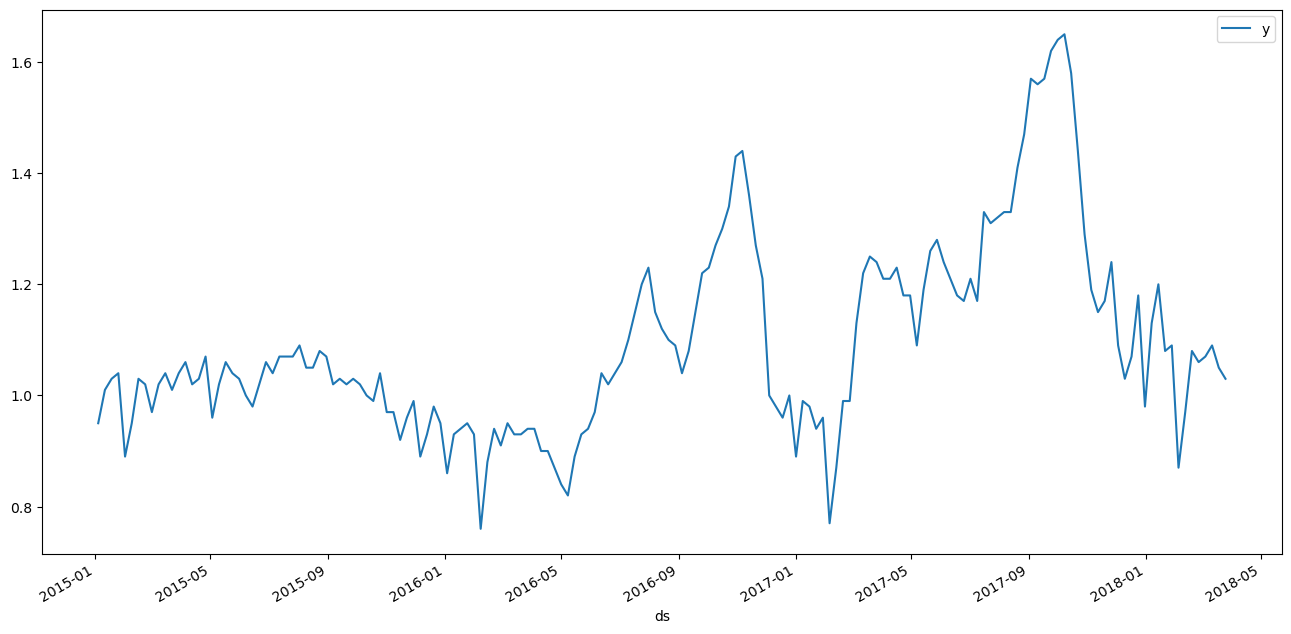

In [16]:
data.plot(x='ds', y='y', figsize=(16, 8))

In [17]:
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=365) # 365일치를 예측하겠다
forecast = model.predict(future)
forecast.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
529,2019-03-21,1.171972,0.982701,1.240212,1.105557,1.243971,-0.059338,-0.059338,-0.059338,-0.059338,-0.059338,-0.059338,0.0,0.0,0.0,1.112634
530,2019-03-22,1.171861,0.982617,1.242770,1.105098,1.244227,-0.057928,-0.057928,-0.057928,-0.057928,-0.057928,-0.057928,0.0,0.0,0.0,1.113933
531,2019-03-23,1.171750,0.988483,1.248349,1.104666,1.244346,-0.056045,-0.056045,-0.056045,-0.056045,-0.056045,-0.056045,0.0,0.0,0.0,1.115706
532,2019-03-24,1.171640,0.982341,1.244694,1.104233,1.244507,-0.053704,-0.053704,-0.053704,-0.053704,-0.053704,-0.053704,0.0,0.0,0.0,1.117936
533,2019-03-25,1.171529,0.982268,1.260667,1.103810,1.244679,-0.050936,-0.050936,-0.050936,-0.050936,-0.050936,-0.050936,0.0,0.0,0.0,1.120593


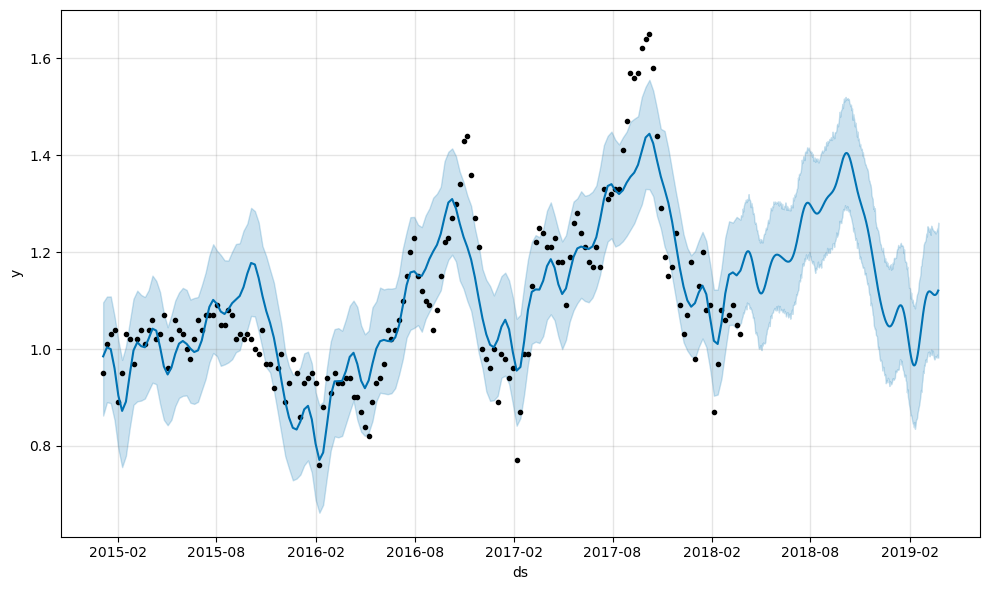

In [18]:
fig1 = model.plot(forecast) # 실데이터(검정색)가 없는 시점부터 예측

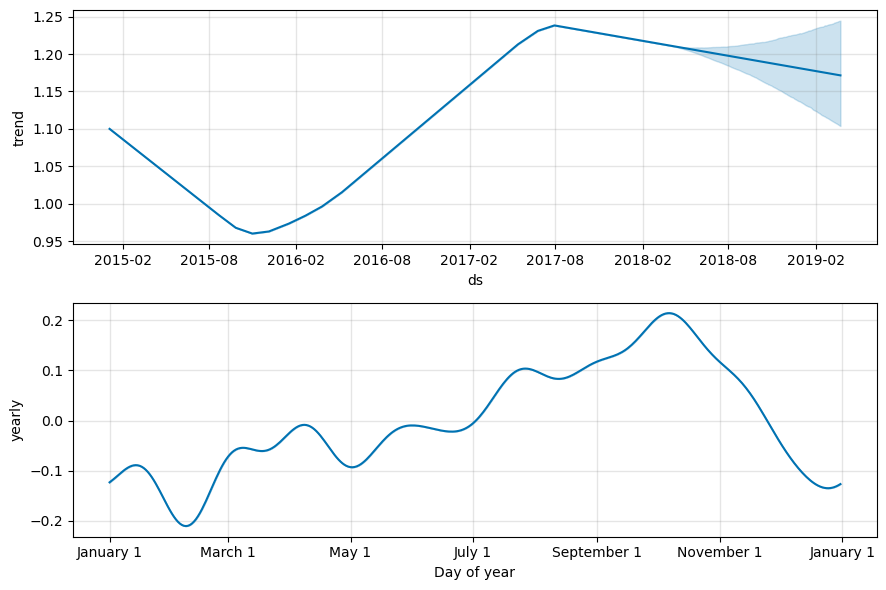

In [20]:
fig2 = model.plot_components(forecast)